In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100)

In [3]:
df = pd.read_csv("data/diabetic_data.csv")

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.shape

(101766, 50)

In [6]:
for e in df.columns:
    df[e] = df[e].replace("?", np.NaN)

In [7]:
def get_nadf (df):
    cols_df = pd.DataFrame(df.isna().sum()[df.isna().sum() != 0])
    cols_df.columns = ["NAs"]
    cols_df["NA_Percentail"] = (cols_df["NAs"]/df.shape[0])*100
    return cols_df

# Missingness handling

In [8]:
get_nadf(df)

,NAs,NA_Percentail
race,2273,2.233555
weight,98569,96.858479
payer_code,40256,39.557416
medical_specialty,49949,49.082208
diag_1,21,0.020636
diag_2,358,0.351787
diag_3,1423,1.398306


In [9]:
df["diag_1"].fillna(0,inplace=True)
df["diag_2"].fillna(0,inplace=True)
df["diag_3"].fillna(0,inplace=True)
df["payer_code"].fillna("NO",inplace=True)
df["medical_specialty"].fillna("Other",inplace=True)
df["race"].fillna("other",inplace=True)
df = df.drop("weight",axis=1)

In [10]:
# Convert the target '<30' is our target so we label them as 1 and others as 0.
df["readmitted"] = df["readmitted"].str.replace("NO","0").replace(">30",0).replace("<30",1).astype(int)

# Feature types

In [11]:
# Change the categorical features data type into object for dummification
df["admission_type_id"] = df["admission_type_id"].astype("object")
df["discharge_disposition_id"] = df["discharge_disposition_id"].astype("object")
df["admission_source_id"] = df["admission_source_id"].astype("object")

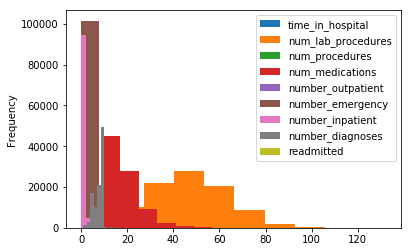

In [12]:
col_numerical = list(df.dtypes[df.dtypes == "int64"][2:].index)
for col in col_numerical:
    df[col].plot.hist()
plt.legend()

In [13]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [14]:
df["change"].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

# Base Line

### Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
def ignore_warn(*args, **kwargs):
	pass
warnings.warn = ignore_warn

In [16]:
X = df.drop(["encounter_id", "patient_nbr", "readmitted"], axis = 1)
Y = df["readmitted"]
X = pd.get_dummies(X, drop_first=True)
X_t, X_holdout, Y_t, Y_holdout = train_test_split(X, Y, test_size = 0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state=0)

In [17]:
print(np.mean(Y))
print(np.mean(Y_t))
print(np.mean(Y_train))
print(np.mean(Y_test))
print(np.mean(Y_holdout))

0.11159915885462728
0.11197366481599764
0.1119470589138479
0.11208008352269237
0.11010120860764469


In [18]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resped, Y_train_resped = rus.fit_resample(X_train, Y_train)

In [19]:
lr = LogisticRegression()
C = np.linspace(0.000001,1,10)
params = {"C": C}
lr_cv = GridSearchCV(lr, params, cv = 5, n_jobs = -1)
lr_cv.fit(X_train_resped, Y_train_resped)
print(C)
print(lr_cv.best_params_)
print(lr_cv.cv_results_['mean_test_score'])

[1.00000e-06 1.11112e-01 2.22223e-01 3.33334e-01 4.44445e-01 5.55556e-01
 6.66667e-01 7.77778e-01 8.88889e-01 1.00000e+00]
{'C': 0.111112}
[0.5        0.61987382 0.61658209 0.61425045 0.61226169 0.61157592
 0.61068441 0.61075298 0.61054725 0.60999863]


In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
def plot_auc(model_cv):
    model = model_cv.best_estimator_
    model.fit(X_train_resped, Y_train_resped)
    model_pre = model.predict_proba(X_test)[:,1]
    print("Test AUC is {}".format(roc_auc_score(Y_test, model_pre)))
    fpr, tpr, thresholds = roc_curve(Y_test, model_pre)
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label="ROC")
    plt.title(str(type(model)).split(".")[-1][:-2])
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.show()

Test AUC is 0.6665396036133003


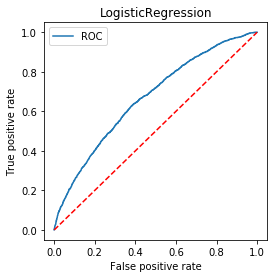

In [21]:
plot_auc(lr_cv)

In [22]:
def sensitivity_analysis(model_cv, percentage):
    model = model_cv.best_estimator_
    model_pre = model.predict_proba(X_test)[:,1]
    order = np.argsort(model_pre)[::-1]
    probs_sub_sorted = model_pre[order]
    Y_test_sorted = np.array(Y_test)[order]
    top_percentage_targeting = percentage
    base_rate = np.mean(Y_test)
    predicted_readrate=np.mean(Y_test_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)])
    print("Sensitivity Analysis for {}:".format(str(type(model)).split(".")[-1][:-2]))
    print("When targeting the top {}% patients.".format(top_percentage_targeting*100))
    print("The model sensitity is {}%".format(round(predicted_readrate*100,1)))
    print("Where the base line is {}%".format(round(base_rate*100,1)))

In [23]:
sensitivity_analysis(lr_cv,0.01)

Sensitivity Analysis for LogisticRegression:
When targeting the top 1.0% patients.
The model sensitity is 33.3%
Where the base line is 11.2%


# Feature Importance

In [24]:
def linear_featureimportance(features,model):
    coefs_df = pd.concat([pd.DataFrame(features.columns), pd.DataFrame(np.abs(model.coef_[0]))], axis = 1)
    coefs_df.columns = ["Col", "Coef"]
    return coefs_df.sort_values(by="Coef", ascending = False)

In [25]:
linear_featureimportance(X,lr).head(10)

,Col,Coef
40,discharge_disposition_id_11,1.936979
50,discharge_disposition_id_22,1.229129
870,diag_1_V58,0.854355
34,discharge_disposition_id_5,0.780611
55,discharge_disposition_id_28,0.703584
42,discharge_disposition_id_13,0.598441
44,discharge_disposition_id_15,0.520584
31,discharge_disposition_id_2,0.497519
2291,diag_3_996,0.465277
416,diag_1_403,0.444231


### Gradient Boosting Feature Importance

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
X = df.drop(["encounter_id", "patient_nbr", "readmitted"], axis = 1)
Y = df["readmitted"]

le = LabelEncoder()
col_categrocial = list(df.dtypes[df.dtypes!="int64"].index)
for col in col_categrocial:
    X[col] = le.fit_transform(X[col].astype(str))
X_t, X_holdout, Y_t, Y_holdout = train_test_split(X, Y, test_size = 0.2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Y_t, test_size = 0.2, random_state=0)
rus = RandomUnderSampler(random_state=0)
X_train_resped, Y_train_resped = rus.fit_resample(X_train, Y_train)
X_test_matrix = X_test.as_matrix()
X_holdout_matrix = X_holdout.as_matrix()

In [27]:
gbm = GradientBoostingClassifier(learning_rate = 0.1)
m_d = [5]
n_e = [20,30,50]
params = {"max_depth": m_d, "n_estimators": n_e}
gbm_cv = GridSearchCV(gbm, params, cv = 5, n_jobs = -1)
gbm_cv.fit(X_train_resped, Y_train_resped)
print(gbm_cv.best_params_)
print(gbm_cv.cv_results_['mean_test_score'])

{'max_depth': 5, 'n_estimators': 50}
[0.61925662 0.6226855  0.62474283]


In [64]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gbm_cv.best_estimator_, random_state = 0).fit(X_train, Y_train)
eli5.show_weights(perm, top=30)

Weight,Feature
0.0343 ± 0.0023,x14
0.0246 ± 0.0014,x4
0.0107 ± 0.0009,x15
0.0044 ± 0.0004,x17
0.0035 ± 0.0008,x9
0.0030 ± 0.0010,x5
0.0028 ± 0.0004,x16
0.0027 ± 0.0006,x3
0.0025 ± 0.0007,x2
0.0017 ± 0.0009,x45


In [82]:
gbm_feature_list = [14,4,15,17,9,5,16,3,2,45,12,18,21,13,27,7,28,19,0,25,6,20,10,32,30,38,8]
gbm_perm_fi = list(np.array(X_train.columns)[gbm_feature_list])

27

In [83]:
def fi_df (model):    
    df = pd.concat([pd.DataFrame(model.feature_importances_),pd.DataFrame(X_train.columns)],axis=1)
    df.columns = ["Importance", "Features"]
    return df[df["Importance"]!=0].sort_values(by="Importance",ascending = False)

In [95]:
fi_df(gbm)

,Importance,Features
14,0.291823,number_inpatient
4,0.189462,discharge_disposition_id
15,0.095922,diag_1
17,0.051503,diag_3
9,0.041338,num_lab_procedures
16,0.034850,diag_2
6,0.034619,time_in_hospital
2,0.028217,age
11,0.026834,num_medications
18,0.026129,number_diagnoses


In [94]:
gbm_fi = list(fi_df(gbm)["Features"])

Test AUC is 0.6674744607431635


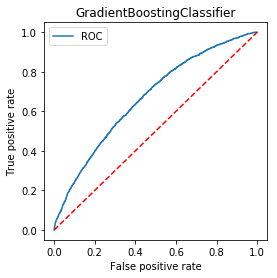

In [30]:
plot_auc(gbm_cv)

In [31]:
sensitivity_analysis(gbm_cv, 0.05)

Sensitivity Analysis for GradientBoostingClassifier:
When targeting the top 5.0% patients.
The model sensitity is 27.1%
Where the base line is 11.2%


### XGBoost

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(silent = 1, eta = 0.05)
c_b = [0.3, 0.4]
m_d = [5,6,7]
n_e = [50,80,100]
params = {"max_depth": m_d, "n_estimators": n_e, "colsample_bytree": c_b}
xgb_cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
xgb_cv.fit(X_train_resped, Y_train_resped)
print(xgb_cv.best_params_)
print(xgb_cv.cv_results_['mean_test_score'])

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 80}
[0.62981758 0.63166918 0.6303662  0.62673159 0.62913181 0.62913181
 0.63132629 0.62968043 0.62782883 0.62645728 0.62810314 0.62748594
 0.62851461 0.6303662  0.6276231  0.63091483 0.62954327 0.62872034]


Test AUC is 0.6795331020224855


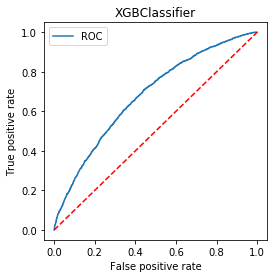

In [33]:
xgb = xgb_cv.best_estimator_
plot_auc(xgb)

In [36]:
sensitivity_analysis(xgb, 0.05)

Sensitivity Analysis for XGBClassifier:
When targeting the top 5.0% patients.
The model sensitity is 27.8%
Where the base line is 11.2%


In [96]:
perm = PermutationImportance(xgb_cv.best_estimator_, random_state = 0).fit(X_train_resped, Y_train_resped)
eli5.show_weights(perm, top=40)

Weight,Feature
0.0542 ± 0.0050,x14
0.0505 ± 0.0043,x4
0.0197 ± 0.0026,x15
0.0143 ± 0.0037,x17
0.0104 ± 0.0025,x9
0.0097 ± 0.0016,x16
0.0087 ± 0.0012,x6
0.0065 ± 0.0006,x2
0.0065 ± 0.0011,x7
0.0061 ± 0.0017,x11


In [99]:
xgb_feature_list = [14,4,15,17,9,16,6,2,7,11,21,8,45,5,13,18,12,10,3,38,44,20,1,27,28,19,25,0,30,22,23]
xgb_perm_fi = list(np.array(X_train.columns)[xgb_feature_list])

In [102]:
xgb_fi = list(fi_df(xgb)["Features"])

# Reduced Model Experiment

In [147]:
# Function to generate the train test data with reduced features
def reduced_train_test(feature_selecting):
    X_tr = X_train[feature_selecting]
    X_ts = X_test[feature_selecting]
    rus = RandomUnderSampler(random_state=0)
    X_tr_resped, Y_tr_resped = rus.fit_resample(X_tr, Y_train)
    return X_tr_resped, Y_tr_resped, X_ts, Y_test

# AUC function for reduced models
def plot_reduced_auc(model_cv, feature_selecting):
    model = model_cv.best_estimator_
    X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(feature_selecting)
    model.fit(X_train_1, Y_train_1)
    X_test_1=X_test_1.as_matrix()
    model_pre = model.predict_proba(X_test_1)[:,1]
    print("Test AUC is {}".format(roc_auc_score(Y_test_1, model_pre)))
    fpr, tpr, thresholds = roc_curve(Y_test_1, model_pre)
    plt.figure(figsize = (4,4))
    plt.plot(fpr, tpr, label="ROC")
    plt.title(str(type(model)).split(".")[-1][:-2])
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend()
    plt.show()
    
#Sensitivity analysis for reduced models
def sensitivity_analysis_reduced(model_cv, feature_selecting, percentage):
    model = model_cv.best_estimator_
    X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(feature_selecting)
    X_test_1=X_test_1.as_matrix()
    model_pre = model.predict_proba(X_test_1)[:,1]
    order = np.argsort(model_pre)[::-1]
    probs_sub_sorted = model_pre[order]
    Y_test_sorted = np.array(Y_test_1)[order]
    top_percentage_targeting = percentage
    base_rate = np.mean(Y_test)
    predicted_readrate=np.mean(Y_test_sorted[0:int(len(Y_test_sorted)*top_percentage_targeting)])
    print("Sensitivity Analysis for {}:".format(str(type(model)).split(".")[-1][:-2]))
    print("When targeting the top {}% patients.".format(top_percentage_targeting*100))
    print("The model sensitity is {}%".format(round(predicted_readrate*100,1)))
    print("Where the base line is {}%".format(round(base_rate*100,1)))

## GBM reduced results

In [137]:
#Re cross validate
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(gbm_perm_fi)
gbm = GradientBoostingClassifier(learning_rate = 0.1)
m_d = [3,5,8]
n_e = [20,30,50]
params = {"max_depth": m_d, "n_estimators": n_e}
gbm_cv = GridSearchCV(gbm, params, cv = 5, n_jobs = -1)
gbm_cv.fit(X_train_1, Y_train_1)
print(gbm_cv.best_params_)
print(gbm_cv.cv_results_['mean_test_score'])

{'max_depth': 5, 'n_estimators': 30}
[0.61390756 0.61898231 0.62062817 0.62343986 0.62686874 0.62584008
 0.61959951 0.62398848 0.62467426]


Test AUC is 0.6654520699541611


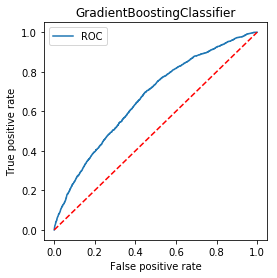

In [127]:
plot_reduced_auc(gbm_cv,gbm_perm_fi)

In [139]:
sensitivity_analysis_reduced(gbm_cv,gbm_perm_fi,0.05)

Sensitivity Analysis for GradientBoostingClassifier:
When targeting the top 5.0% patients.
The model sensitity is 27.3%
Where the base line is 11.2%


In [141]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(gbm_fi)
gbm = GradientBoostingClassifier(learning_rate = 0.1)
m_d = [3,5,8]
n_e = [50,60,80]
params = {"max_depth": m_d, "n_estimators": n_e}
gbm_cv = GridSearchCV(gbm, params, cv = 5, n_jobs = -1)
gbm_cv.fit(X_train_1, Y_train_1)
print(gbm_cv.best_params_)
print(gbm_cv.cv_results_['mean_test_score'])

{'max_depth': 5, 'n_estimators': 50}
[0.61884515 0.61925662 0.62131395 0.62446852 0.6208339  0.6220683
 0.61918804 0.61939377 0.62007955]


Test AUC is 0.6673324149117803


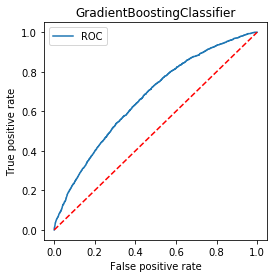

In [133]:
plot_reduced_auc(gbm_cv, gbm_fi)

In [142]:
sensitivity_analysis_reduced(gbm_cv,gbm_fi,0.05)

Sensitivity Analysis for GradientBoostingClassifier:
When targeting the top 5.0% patients.
The model sensitity is 27.1%
Where the base line is 11.2%


## XGBoost Reduced Results

In [144]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(xgb_perm_fi)
xgb = XGBClassifier(silent = 1, eta = 0.05)
c_b = [0.2, 0.3]
m_d = [3,4,5]
n_e = [50,80,100]
params = {"max_depth": m_d, "n_estimators": n_e, "colsample_bytree": c_b}
xgb_cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
xgb_cv.fit(X_train_1, Y_train_1)
print(xgb_cv.best_params_)
print(xgb_cv.cv_results_['mean_test_score'])

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 80}
[0.62254835 0.62371417 0.62494857 0.62241119 0.62796599 0.62748594
 0.62378275 0.62961185 0.62872034 0.62350844 0.62570292 0.62659443
 0.62625154 0.6288575  0.63214923 0.63201207 0.63262927 0.63166918]


Test AUC is 0.673871810080024


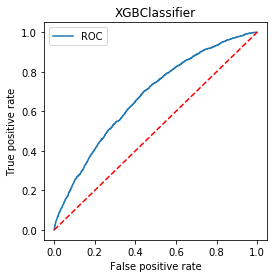

In [148]:
plot_reduced_auc(xgb_cv,xgb_perm_fi)

In [149]:
sensitivity_analysis_reduced(xgb_cv,xgb_perm_fi,0.05)

Sensitivity Analysis for XGBClassifier:
When targeting the top 5.0% patients.
The model sensitity is 27.5%
Where the base line is 11.2%


In [151]:
X_train_1, Y_train_1, X_test_1, Y_test_1 = reduced_train_test(xgb_fi)
xgb = XGBClassifier(silent = 1, eta = 0.05)
c_b = [0.3, 0.4]
m_d = [4,5,6]
n_e = [50,80,100]
params = {"max_depth": m_d, "n_estimators": n_e, "colsample_bytree": c_b}
xgb_cv = GridSearchCV(xgb, params, cv = 5, n_jobs = -1)
xgb_cv.fit(X_train_1, Y_train_1)
print(xgb_cv.best_params_)
print(xgb_cv.cv_results_['mean_test_score'])

{'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 100}
[0.62474283 0.62810314 0.62693732 0.62439995 0.63016047 0.63235496
 0.62529146 0.62707448 0.62837745 0.62536003 0.62584008 0.6282403
 0.62686874 0.62789741 0.62597723 0.62707448 0.62872034 0.62536003]


Test AUC is 0.6778850027571596


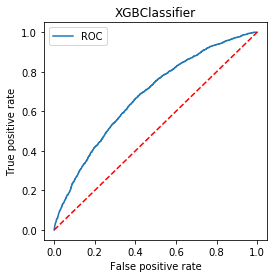

In [152]:
plot_reduced_auc(xgb_cv,xgb_fi)

In [155]:
sensitivity_analysis_reduced(xgb_cv,xgb_fi,0.05)

Sensitivity Analysis for XGBClassifier:
When targeting the top 5.0% patients.
The model sensitity is 28.7%
Where the base line is 11.2%
